In [ ]:
!pip -qq install bertopic

     |████████████████████████████████| 57 kB 3.5 MB/s 
     |████████████████████████████████| 5.2 MB 22.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 3.8 MB 46.1 MB/s 
     |████████████████████████████████| 1.2 MB 47.9 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 6.5 MB 39.6 MB/s 
     |████████████████████████████████| 895 kB 51.2 MB/s 
     |████████████████████████████████| 636 kB 47.4 MB/s 
     |████████████████████████████████| 1.1 MB 43.6 MB/s 


In [ ]:
import pandas as pd
from bertopic import BERTopic

In [ ]:
news_df = pd.read_csv("sentimentanalysis.csv" , header = 0)
news_df.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)
news_df.drop(news_df.columns[[0,5]], axis = 1, inplace = True)
news_df.columns = ["link", "date", "header", "body_text",
                     "cleaned_text","website", "blob_polarity"]
news_df

,link,date,header,body_text,cleaned_text,website,blob_polarity
0,https://seniorsfirstbc.ca/news/seniors-first-b...,10/1/2021,Seniors First BC 2020-2021 Annual Report Release,Seniors First BC recently released its Annual ...,Seniors First BC recently released its Annual ...,seniors_first_bc_news,0.125000
1,https://seniorsfirstbc.ca/news/seniors-first-b...,7/26/2021,Seniors First BC Hiring Part-Time Seniors Abus...,We are hiring a part-time Intake Worker to ans...,We are hiring a part-time Intake Worker to ans...,seniors_first_bc_news,0.300000
2,https://seniorsfirstbc.ca/news/vaccine-appoint...,3/1/2021,Vaccine Appointments for Seniors,"Vaccine call centres for seniors open March 8,...","Vaccine call centres for seniors open March 8,...",seniors_first_bc_news,0.366667
3,https://seniorsfirstbc.ca/news/11839/,8/6/2020,ABUSE VERSUS NEGLECT,ABUSE VERSUS NEGLECT Abuse is an action that c...,ABUSE VERSUS NEGLECT Abuse is an action that c...,seniors_first_bc_news,0.209425
4,https://seniorsfirstbc.ca/news/what-to-do-if-y...,8/5/2020,What To Do if You’ve Fallen Victim to a Scam,What To Do if You’ve Fallen Victim to a Scam ...,What To Do if You’ve Fallen Victim to a Scam S...,seniors_first_bc_news,0.109195
...,...,...,...,...,...,...,...
1086,https://helpagecanada.ca/2015/09/helpage-inter...,9/28/2015,HelpAge International Releases Third Global Ag...,HelpAge International has released the third G...,International has released the third Global Ag...,helpage_news,0.068469
1087,https://helpagecanada.ca/2015/07/join-us-on-oc...,7/28/2015,"Join us on October 1, 2015 for Seen Your Citiz...",About a million Canadian seniors describe them...,About a million Canadian seniors describe them...,helpage_news,0.070513
1088,https://helpagecanada.ca/2015/06/minister-alic...,6/15/2015,Minister Alice Wong marks Elder Abuse Day at H...,"Alice Wong, Minister of State (Seniors), visit...","Alice Wong, Minister of State (Seniors), visit...",helpage_news,0.091414
1089,https://helpagecanada.ca/2015/02/february-2-20...,2/2/2015,HelpAge International Releases Report on Impac...,"In 2050, for the first time in history there w...","In 2050, for the first time in history there w...",helpage_news,0.098485


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Removing StopWords

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

df_nostop ={}
df_nostop['nostop'] = []
filtered_sentence = []

for i in news_df['cleaned_text']:
  word_tokens = word_tokenize(i)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  nostop = ' '.join(filtered_sentence)
  df_nostop['nostop'].append(nostop)

In [ ]:
df_nostop['nospec'] = []
no_spec =[]
for i in news_df['cleaned_text']:
  no_spec = ''.join(e for e in i if (e.isalnum() or e.isspace()))
  df_nostop['nospec'].append(no_spec)

In [ ]:
#Removing non english words
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
words = set(nltk.corpus.words.words())

df_nostop['only_english'] = []
onlyenglish = []

for i in df_nostop['nospec']:
  onlyenglish = " ".join(w for w in nltk.wordpunct_tokenize(i) \
         if w.lower() in words or not w.isalpha())
  df_nostop['only_english'].append(onlyenglish)

In [ ]:
df_nostop['nospec'][0:5]

['Seniors First BC recently released its Annual Report for 20202021 The report provides updates and statistics about its programs during this period To read the report visithere',
 'We are hiring a parttime Intake Worker to answer our Seniors Abuse and Information Line SAIL For the full job description please visithere Contactinfoseniorsfirstbccaif you have any questions about this position The posting will remain open until a suitable candidate has been recruited',
 'Vaccine call centres for seniors open March 8 2021 You can book a vaccine appointment for yourself or your spouse Its easy and safe to book over the phone Our SAIL staff can assist as well Call us at Call or Toll Free Click here for more details',
 'ABUSE VERSUS NEGLECT Abuse is an action that causes harm to another individual and neglect is the nonaction of not providing care or assistance to a dependent person Canadaca 2016 Elder abuse has no single definition and the stories of abuse and neglect are varied and complex 

In [ ]:
df_nostop['only_english'][0:5]

['First recently its Annual Report for 20202021 The report and statistics about its during this period To read the report',
 'We are a Intake Worker to answer our Abuse and Information Line SAIL For the full job description please you have any about this position The posting will remain open until a suitable candidate been',
 'Vaccine call for open March 8 2021 You can book a vaccine appointment for yourself or your spouse Its easy and safe to book over the phone Our SAIL staff can assist as well Call us at Call or Toll Free Click here for more',
 'ABUSE VERSUS NEGLECT Abuse is an action that harm to another individual and neglect is the nonaction of not providing care or assistance to a dependent person 2016 Elder abuse no single definition and the of abuse and neglect are varied and complex Most people never like to consider themselves as a victim which is why we use the word survivor when speaking about those who have experienced abuse Elder abuse is more common than you might think

In [ ]:
news_df['nostop'] = df_nostop['nostop']

### Stemming and Lemmatization

In [ ]:
import nltk
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import *
from nltk.stem import PorterStemmer
nltk.download('wordnet')

stemmer = SnowballStemmer('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
porter = PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [ ]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
df_lemma ={}
df_lemma['lemmatized'] = []
for i in news_df['cleaned_text']:
  lemma = ' '.join(preprocess(i))
  df_lemma['lemmatized'].append(lemma)

In [ ]:
news_df['lemmatized'] = df_lemma['lemmatized']

### BERT Topic Modeling

In [ ]:
# Instanciating BERTopic
topic_model = BERTopic(language = "english", calculate_probabilities = True, verbose = True)

In [ ]:
# Fitting
topics, probs = topic_model.fit_transform(news_df['lemmatized'])

In [ ]:
topic_model.save("BERTopic_elderly_news_model")

In [ ]:
topic_model = BERTopic.load("BERTopic_elderly_news_model")

In [ ]:
topic_model.get_topic_info().head(20)

,Topic,Count,Name
0,0,298,0_hous_home_afford_build
1,-1,201,-1_senior_care_older_help
2,1,150,1_year_like_hair_love
3,2,68,2_blood_diet_diabet_heart
4,3,57,3_senior_care_report_advoc
5,4,54,4_social_older_adult_care
6,5,39,5_vaccin_covid_outbreak_pandem
7,6,38,6_walk_exercis_fall_speed
8,7,27,7_senior_campaign_intern_older
9,8,26,8_cognit_dementia_brain_hear


In [ ]:
print(f"Topics discovered: {max(topic_model.get_topic_info()['Topic']) +1}")

Topics discovered: 17


In [ ]:
news_df['topic'] = topics
news_df.head()

,link,date,header,body_text,cleaned_text,website,blob_polarity,nostop,lemmatized,topic
0,https://seniorsfirstbc.ca/news/seniors-first-b...,10/1/2021,Seniors First BC 2020-2021 Annual Report Release,Seniors First BC recently released its Annual ...,Seniors First BC recently released its Annual ...,seniors_first_bc_news,0.125000,Seniors First BC recently released Annual Repo...,senior recent releas annual report report prov...,3
1,https://seniorsfirstbc.ca/news/seniors-first-b...,7/26/2021,Seniors First BC Hiring Part-Time Seniors Abus...,We are hiring a part-time Intake Worker to ans...,We are hiring a part-time Intake Worker to ans...,seniors_first_bc_news,0.300000,hiring part-time Intake Worker answer Seniors ...,hire time intak worker answer senior abus info...,7
2,https://seniorsfirstbc.ca/news/vaccine-appoint...,3/1/2021,Vaccine Appointments for Seniors,"Vaccine call centres for seniors open March 8,...","Vaccine call centres for seniors open March 8,...",seniors_first_bc_news,0.366667,"Vaccine call centres seniors open March 8 , 20...",vaccin centr senior open march book vaccin app...,5
3,https://seniorsfirstbc.ca/news/11839/,8/6/2020,ABUSE VERSUS NEGLECT,ABUSE VERSUS NEGLECT Abuse is an action that c...,ABUSE VERSUS NEGLECT Abuse is an action that c...,seniors_first_bc_news,0.209425,ABUSE VERSUS NEGLECT Abuse action causes harm ...,abus versus neglect abus action caus harm indi...,10
4,https://seniorsfirstbc.ca/news/what-to-do-if-y...,8/5/2020,What To Do if You’ve Fallen Victim to a Scam,What To Do if You’ve Fallen Victim to a Scam ...,What To Do if You’ve Fallen Victim to a Scam S...,seniors_first_bc_news,0.109195,’ Fallen Victim Scam Scammers target seniors h...,fall victim scam scammer target senior high sk...,-1


In [ ]:
news_df.to_csv('topic_elderly_news.csv')

In [ ]:
topic_model.visualize_barchart(top_n_topics=16)

In [ ]:
topic_model.visualize_term_rank()

In [ ]:
topic_model.get_topic(2)

[('blood', 0.05065371994359806),
 ('diet', 0.048634383896545175),
 ('diabet', 0.04647283573267361),
 ('heart', 0.03302829934278283),
 ('weight', 0.03261746999048885),
 ('pressur', 0.03198566273306212),
 ('health', 0.03126076083233562),
 ('diseas', 0.0304320827168607),
 ('vitamin', 0.030195908652782422),
 ('supplement', 0.027697525193416995)]

In [ ]:
covid_topics, covid_topics_similarity = topic_model.find_topics("covid", top_n=8)
covid_topics, covid_topics_similarity

([5, 0, 4, 12, 14, 7, 2, 6],
 [0.724833927387293,
  0.5001418319475763,
  0.43137685869949455,
  0.42936022609786034,
  0.4288731670738206,
  0.4267232730468722,
  0.4252761813833041,
  0.4183936228234978])

In [ ]:
health_topics, health_topics_similarity = topic_model.find_topics("health", top_n=4)
health_topics, health_topics_similarity

([2, 5, 12, 4],
 [0.7373827700487817,
  0.630025704765296,
  0.6185706346876738,
  0.6075983690004023])

In [ ]:
house_topics, house_topics_similarity = topic_model.find_topics("house", top_n=6)
house_topics, house_topics_similarity

([0, 4, 7, 6, 8, -1],
 [0.5984315846714925,
  0.5137350482749384,
  0.48867835224776596,
  0.46684993208858,
  0.46416310310322334,
  0.463258915391315])

In [ ]:
homecare_topics, homecare_topics_similarity = topic_model.find_topics("homecare", top_n=3)
homecare_topics, homecare_topics_similarity

([0, 4, 5], [0.4358412963501482, 0.42459956042763797, 0.4125670530688317])

In [ ]:
money_topics, money_topics_similarity = topic_model.find_topics("money", top_n=3)
money_topics, money_topics_similarity

([1, 4, 13], [0.5684927187535675, 0.5261289278677477, 0.5205647724371341])

In [ ]:
charity_topics, charity_topics_similarity = topic_model.find_topics("charity", top_n=3)
charity_topics, charity_topics_similarity

([5, 2, 12], [0.5164840475796681, 0.5041100273288914, 0.4947891044159261])

In [ ]:
safety_topics, safety_topics_similarity = topic_model.find_topics("safety", top_n=3)
safety_topics, safety_topics_similarity

([12, 5, -1], [0.4743744368305005, 0.4489881453637011, 0.42249542023545056])

In [ ]:
activity_topics, activity_topics_similarity = topic_model.find_topics("activity", top_n=10)
activity_topics, activity_topics_similarity

([6, 0, 8, 16, -1, 4, 9, 7, 11, 15],
 [0.6280601653531159,
  0.4995983035914304,
  0.4898957301893603,
  0.48951873768508913,
  0.48881417471299415,
  0.4812621007946321,
  0.46514826874628334,
  0.46463365354604963,
  0.462556018020702,
  0.4464992721041772])

In [ ]:
first_nations_topics, first_nations_topics_similarity = topic_model.find_topics("first nations", top_n=8)
first_nations_topics, first_nations_topics_similarity

([10, 7, 5, 3, 0, 4, 11, 13],
 [0.33246451304533126,
  0.3245503967419684,
  0.30288172157656684,
  0.28808232398526323,
  0.2862973496338188,
  0.284505091376142,
  0.25521029679550217,
  0.2525314809291426])

In [ ]:
first_nations_topics, first_nations_topics_similarity = topic_model.find_topics("inter generation", top_n=8)
first_nations_topics, first_nations_topics_similarity

([4, 3, 11, 8, 10, 0, -1, 5],
 [0.41291530581024233,
  0.39799058453967084,
  0.38993885437842624,
  0.3849421366375858,
  0.38140411753841763,
  0.38072382741135,
  0.3787966342497869,
  0.37682035522973406])

In [ ]:
categories = ['covid', 'health', 'house', 'homecare', 'money', 'volunteer',
              'safety', 'abuse', 'physical activity', 'social activity',
              'first nations', 'schooling', 'environment', 'autonomy',
              'freedom', 'climate', 'temperature', 'vaccine', 'grocery']

similarity_cutoff = 0.50
top_n = 20

my_topics = {}
for category in categories:
  # Initiate category list
  my_topics[str(category)] = []

  # Get topics and similarities for given category
  topics, similarities = topic_model.find_topics(category, top_n = top_n)

  # Populate my_topics dict
  for topic, similarity in zip(topics, similarities):
    if similarity >= similarity_cutoff:
      my_topics[str(category)].append(topic)

In [ ]:
for key, value in zip(my_topics.keys(), my_topics.values()):
  print(key, value)

covid [5, 0]
health [2, 5, 12, 4, -1, 9, 14, 6, 15]
house [0, 4]
homecare []
money [1, 4, 13, 0, 2]
volunteer []
safety []
abuse [9, 10]
physical activity [6]
social activity [4]
first nations []
schooling []
environment []
autonomy []
freedom []
climate []
temperature []
vaccine [5]
grocery []


In [ ]:
topic_model.get_topics()

{-1: [('senior', 0.02247740128224135),
  ('care', 0.02203305271088086),
  ('older', 0.019283146429566585),
  ('help', 0.017237320268354287),
  ('health', 0.016556263610227297),
  ('medic', 0.016236764957755202),
  ('adult', 0.01616902826385811),
  ('studi', 0.015760783450092353),
  ('effect', 0.01523571016902383),
  ('peopl', 0.014762291295219087)],
 0: [('hous', 0.07601227258337048),
  ('home', 0.04990010944545549),
  ('afford', 0.04381010745713621),
  ('build', 0.03857845108728577),
  ('peopl', 0.03822427433437531),
  ('communiti', 0.03430924816852318),
  ('project', 0.034030088756675694),
  ('support', 0.03318818820355369),
  ('incom', 0.031021060700324114),
  ('provid', 0.029766580332065203)],
 1: [('year', 0.023530292130509733),
  ('like', 0.020123655819586552),
  ('hair', 0.01948201282323784),
  ('love', 0.01872200413321826),
  ('time', 0.018364642211176067),
  ('say', 0.01830088050413446),
  ('want', 0.01763689881591529),
  ('look', 0.016020167138205907),
  ('women', 0.015916381

In [ ]:
# Assigning topics
for i, topic in enumerate(news_df['topic']):
  news_df.loc[i, 'topics'] = ''
  temp_topics = []
  for key, value in zip(my_topics.keys(), my_topics.values()):
    if topic in value:
      temp_topics.append(key)
    news_df.loc[i, 'topics'] = ', '.join(temp_topics)

In [ ]:
news_df

,link,date,header,body_text,cleaned_text,website,blob_polarity,nostop,lemmatized,topic,topics
0,https://seniorsfirstbc.ca/news/seniors-first-b...,10/1/2021,Seniors First BC 2020-2021 Annual Report Release,Seniors First BC recently released its Annual ...,Seniors First BC recently released its Annual ...,seniors_first_bc_news,0.125000,Seniors First BC recently released Annual Repo...,senior recent releas annual report report prov...,3,
1,https://seniorsfirstbc.ca/news/seniors-first-b...,7/26/2021,Seniors First BC Hiring Part-Time Seniors Abus...,We are hiring a part-time Intake Worker to ans...,We are hiring a part-time Intake Worker to ans...,seniors_first_bc_news,0.300000,hiring part-time Intake Worker answer Seniors ...,hire time intak worker answer senior abus info...,7,
2,https://seniorsfirstbc.ca/news/vaccine-appoint...,3/1/2021,Vaccine Appointments for Seniors,"Vaccine call centres for seniors open March 8,...","Vaccine call centres for seniors open March 8,...",seniors_first_bc_news,0.366667,"Vaccine call centres seniors open March 8 , 20...",vaccin centr senior open march book vaccin app...,5,"covid, health, vaccine"
3,https://seniorsfirstbc.ca/news/11839/,8/6/2020,ABUSE VERSUS NEGLECT,ABUSE VERSUS NEGLECT Abuse is an action that c...,ABUSE VERSUS NEGLECT Abuse is an action that c...,seniors_first_bc_news,0.209425,ABUSE VERSUS NEGLECT Abuse action causes harm ...,abus versus neglect abus action caus harm indi...,10,abuse
4,https://seniorsfirstbc.ca/news/what-to-do-if-y...,8/5/2020,What To Do if You’ve Fallen Victim to a Scam,What To Do if You’ve Fallen Victim to a Scam ...,What To Do if You’ve Fallen Victim to a Scam S...,seniors_first_bc_news,0.109195,’ Fallen Victim Scam Scammers target seniors h...,fall victim scam scammer target senior high sk...,-1,health
...,...,...,...,...,...,...,...,...,...,...,...
1086,https://helpagecanada.ca/2015/09/helpage-inter...,9/28/2015,HelpAge International Releases Third Global Ag...,HelpAge International has released the third G...,International has released the third Global Ag...,helpage_news,0.068469,International released third Global AgeWatch I...,intern releas global agewatch index intern ind...,11,
1087,https://helpagecanada.ca/2015/07/join-us-on-oc...,7/28/2015,"Join us on October 1, 2015 for Seen Your Citiz...",About a million Canadian seniors describe them...,About a million Canadian seniors describe them...,helpage_news,0.070513,million Canadian seniors describe lonely socia...,million canadian senior lone social isol socia...,4,"health, house, money, social activity"
1088,https://helpagecanada.ca/2015/06/minister-alic...,6/15/2015,Minister Alice Wong marks Elder Abuse Day at H...,"Alice Wong, Minister of State (Seniors), visit...","Alice Wong, Minister of State (Seniors), visit...",helpage_news,0.091414,"Alice Wong , Minister State ( Seniors ) , visi...",alic wong minist state senior visit headquart ...,7,
1089,https://helpagecanada.ca/2015/02/february-2-20...,2/2/2015,HelpAge International Releases Report on Impac...,"In 2050, for the first time in history there w...","In 2050, for the first time in history there w...",helpage_news,0.098485,"2050 , first time history people 60+ world chi...",time histori peopl world children live develop...,-1,health


In [ ]:
news_df.to_csv('topic_elderly_news.csv')

### Word Cloud

In [ ]:
!pip -qq install wordcloud

<function matplotlib.pyplot.show>

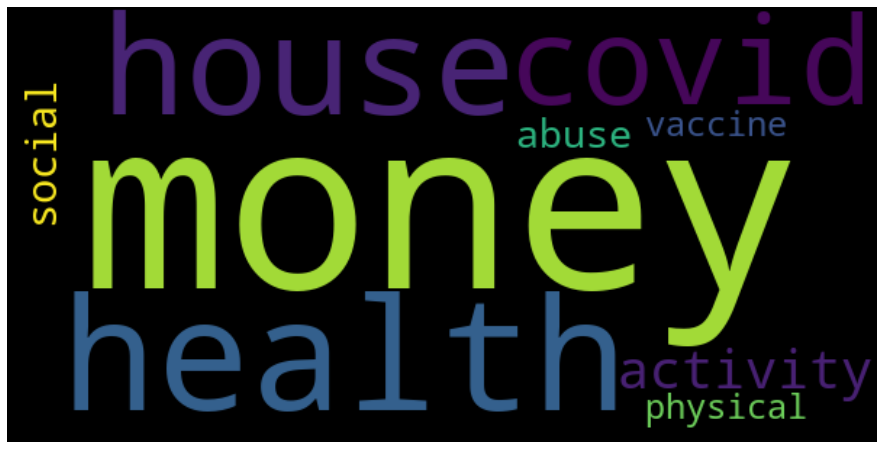

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color = 'black',
               collocations = False,
               width = 600,
               height = 300).generate(', '.join(news_df['topics'].tolist()))

plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show